In [1]:
# Import seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import setup and seaborn_helpers
from setup.setup import *

In [3]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,27290,2024-04-20,Saturday,Skyz,New York Subliners,4,Vista,Hardpoint,32,27,...,0,L,NYSL,Subliners,Seattle Surge,SEA,250,444,-56,0
4204,27290,2024-04-20,Saturday,04,Seattle Surge,4,Vista,Hardpoint,31,34,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
4205,27290,2024-04-20,Saturday,Abuzah,Seattle Surge,4,Vista,Hardpoint,31,24,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
4206,27290,2024-04-20,Saturday,Breszy,Seattle Surge,4,Vista,Hardpoint,32,29,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0


In [4]:
# Build series summaries
series_summaries = build_series_summaries(cdlDF)
series_summaries

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
0,27193,Atlanta FaZe,ATL,3,2,1,2023-12-08,BOS
1,27193,Boston Breach,BOS,2,3,-1,2023-12-08,ATL
2,27194,Los Angeles Thieves,LAT,1,3,-2,2023-12-08,SEA
3,27194,Seattle Surge,SEA,3,1,2,2023-12-08,LAT
4,27195,New York Subliners,NYSL,3,2,1,2023-12-08,TX
...,...,...,...,...,...,...,...,...
263,27288,Miami Heretics,MIA,2,3,-1,2024-04-20,LAT
264,27289,Las Vegas Legion,LV,0,3,-3,2024-04-20,TX
265,27289,OpTic Texas,TX,3,0,3,2024-04-20,LV
266,27290,New York Subliners,NYSL,1,3,-2,2024-04-20,SEA


In [6]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,27290,2024-04-20,Saturday,Skyz,New York Subliners,4,Vista,Hardpoint,32,27,...,0,L,NYSL,Subliners,Seattle Surge,SEA,250,444,-56,0
3100,27290,2024-04-20,Saturday,04,Seattle Surge,4,Vista,Hardpoint,31,34,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
3101,27290,2024-04-20,Saturday,Abuzah,Seattle Surge,4,Vista,Hardpoint,31,24,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0
3102,27290,2024-04-20,Saturday,Breszy,Seattle Surge,4,Vista,Hardpoint,32,29,...,1,W,SEA,Surge,New York Subliners,NYSL,194,444,56,0


In [6]:
# Filter cdlDF for player analysis dataframe
queried_df = cdlDF[
    (cdlDF["player"] == "Attach") &
    (cdlDF["gamemode"] == "Hardpoint")
].copy()

queried_df

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
96,27197,2023-12-09,Saturday,Attach,Las Vegas Legion,4,Sub Base,Hardpoint,32,21,...,1,W,LV,Legion,Minnesota ROKKR,MIN,224,474,26,0
148,27200,2023-12-10,Sunday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,17,17,...,0,L,LV,Legion,Carolina Royal Ravens,CAR,250,381,-119,0
648,27228,2024-01-20,Saturday,Attach,Las Vegas Legion,1,Sub Base,Hardpoint,21,30,...,0,L,LV,Legion,Toronto Ultra,TOR,250,467,-33,0
976,35645,2024-01-26,Friday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,22,19,...,0,L,LV,Legion,Los Angeles Guerrillas,LAG,250,477,-23,0
1304,27240,2024-02-18,Sunday,Attach,Las Vegas Legion,1,Karachi,Hardpoint,20,15,...,1,W,LV,Legion,Los Angeles Guerrillas,LAG,192,442,58,0
1328,27240,2024-02-18,Sunday,Attach,Las Vegas Legion,4,Rio,Hardpoint,25,22,...,1,W,LV,Legion,Los Angeles Guerrillas,LAG,236,486,14,0
1456,27245,2024-02-23,Friday,Attach,Las Vegas Legion,4,Rio,Hardpoint,19,16,...,1,W,LV,Legion,Miami Heretics,MIA,135,385,115,0
1472,27246,2024-02-24,Saturday,Attach,Las Vegas Legion,1,Rio,Hardpoint,19,22,...,0,L,LV,Legion,Toronto Ultra,TOR,250,482,-18,0
1496,27246,2024-02-24,Saturday,Attach,Las Vegas Legion,4,Karachi,Hardpoint,20,23,...,0,L,LV,Legion,Toronto Ultra,TOR,250,497,-3,0
1684,27254,2024-03-02,Saturday,Attach,Las Vegas Legion,1,Karachi,Hardpoint,25,22,...,1,W,LV,Legion,Boston Breach,BOS,244,494,6,0


In [10]:
# Set seaborn theme
sns.set_theme(style = "darkgrid")

Text(0, 0.5, 'Kills')

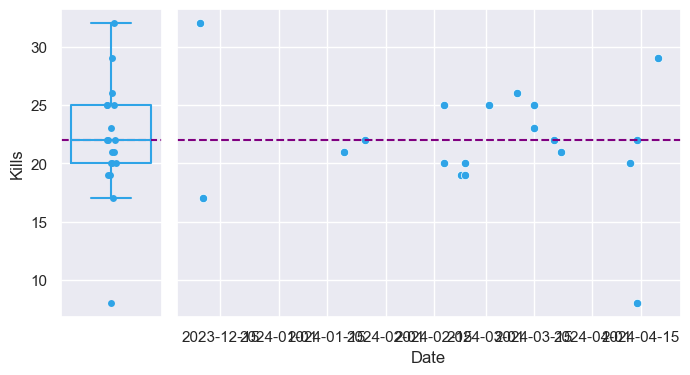

In [14]:
# Player Kills vs Time

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0], color = "#2fa4e7")
axs[0].axhline(y = 22, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "match_date", y = "kills", ax=axs[1], color = "#2fa4e7")
axs[1].axhline(y = 22, color = "purple", linestyle = '--')

# Styling
axs[1].set_xlabel("Date")
axs[0].set_ylabel("Kills")

Text(0, 0.5, 'Kills')

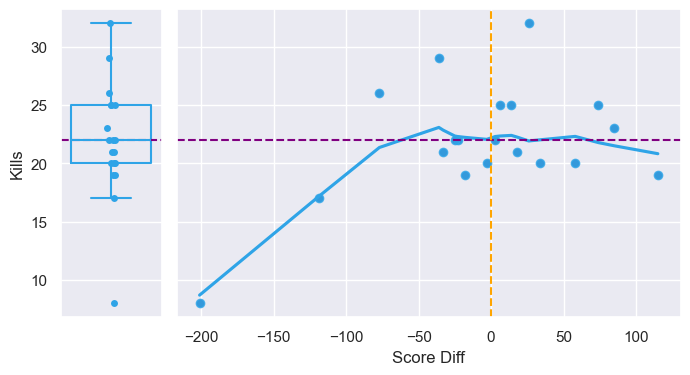

In [13]:
# Player Kills vs Score Diff

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = dict(width_ratios=[0.4, 2], wspace = 0.05), sharey = True)

# Boxplot
sns.boxplot(queried_df, y =  "kills", fill = False, ax=axs[0], color = "#2fa4e7", showfliers = False)
sns.stripplot(queried_df, y = "kills", jitter = 0.05, ax=axs[0], color = "#2fa4e7")
axs[0].axhline(y = 22, color = "purple", linestyle = '--')

# Scatterplot
sns.scatterplot(queried_df, x = "score_diff", y = "kills", ax=axs[1])
sns.regplot(queried_df, x = "score_diff", y = "kills", lowess = True, color = "#2fa4e7")
axs[1].axhline(y = 22, color = "purple", linestyle = '--')
axs[1].axvline(x = 0, color = "orange", linestyle = '--')

# Styling
axs[1].set_xlabel("Score Diff")
axs[0].set_ylabel("Kills")

In [8]:
# Filter series summaries for team series analysis
queried_df = series_summaries[series_summaries["team"] == "OpTic Texas"].copy()
queried_df

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
5,27195,OpTic Texas,TX,2,3,-1,2023-12-08,NYSL
21,27203,OpTic Texas,TX,3,1,2,2023-12-10,MIN
26,27206,OpTic Texas,TX,3,1,2,2023-12-15,SEA
37,27211,OpTic Texas,TX,3,0,3,2023-12-17,CAR
55,27220,OpTic Texas,TX,3,2,1,2024-01-13,LV
67,27226,OpTic Texas,TX,0,3,-3,2024-01-19,MIA
83,27234,OpTic Texas,TX,0,3,-3,2024-01-21,ATL
87,35634,OpTic Texas,TX,3,0,3,2024-01-25,MIA
105,35647,OpTic Texas,TX,2,3,-1,2024-01-27,ATL
108,35649,OpTic Texas,TX,3,1,2,2024-01-27,SEA


Text(0.5, 0, 'Result')

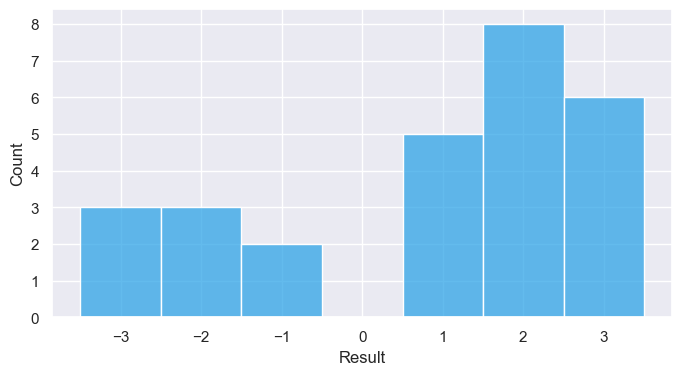

In [14]:
# Team Series Score Diffs

# Create figure
fig, ax = plt.subplots(figsize = (8, 4))

# Histogram
sns.histplot(data = queried_df, x = "series_score_diff", discrete = True, color = "#2fa4e7")

# Styling
ax.set_xlabel("Result")